In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import control as ct
np.set_printoptions(precision= 5, suppress=True)
from prettytable import PrettyTable
from scipy.linalg import eig, expm


In [3]:
m = 4       # mass of aircraft
J = 0.0475  # inertia 
r = 0.25    # distance to center of force
g = 9.8     # gravitational constant
c = 0.05    # damping factor

In [4]:
# Equilibrium point of interest of the state space dynamics
xe = [0, 0, 0, 0, 0, 0]  
ue = [0, m * g] 

# State space can be represented as following 
A = np.array([[0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, (-ue[0]*np.sin(xe[2]) - ue[1]*np.cos(xe[2]))/m, -c/m, 0, 0],
              [0, 0, (ue[0]*np.cos(xe[2]) - ue[1]*np.sin(xe[2]))/m, 0, -c/m, 0],
              [0, 0, 0, 0, 0, 0]])
B = np.array([[0, 0], [0, 0], [0, 0],
              [np.cos(xe[2])/m, -np.sin(xe[2])/m],
              [np.sin(xe[2])/m, np.cos(xe[2])/m],
              [r/J, 0]])
             
C = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])
D = np.array([[0, 0], [0, 0]])
print("A=\n", A, "\nB=\n", B, "\nC=\n", C, "\nD=\n", D)

A=
 [[ 0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.    ]
 [ 0.      0.      0.      0.      0.      1.    ]
 [ 0.      0.     -9.8    -0.0125  0.      0.    ]
 [ 0.      0.      0.      0.     -0.0125  0.    ]
 [ 0.      0.      0.      0.      0.      0.    ]] 
B=
 [[ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.25    -0.     ]
 [ 0.       0.25   ]
 [ 5.26316  0.     ]] 
C=
 [[1 0 0 0 0 0]
 [0 1 0 0 0 0]] 
D=
 [[0 0]
 [0 0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/control/pzmap.py:93: FutureWarning: 'Plot' keyword is deprecated in pzmap; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in pzmap; use 'plot'",


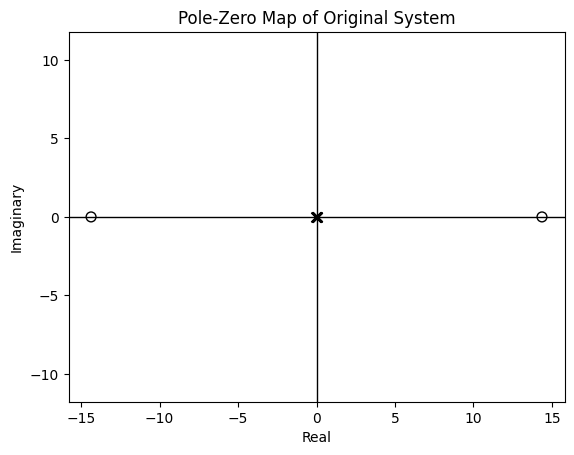

[ 0.    +0.j -0.0125+0.j  0.    +0.j  0.    +0.j -0.0125+0.j  0.    +0.j]


In [5]:
# Pole-zero Map of Original system without LQR controller 
sys = ct.ss(A, B, C, D)
poles, zeros = ct.pzmap(sys, Plot=True)
plt.title('Pole-Zero Map of Original System')
plt.show()
print(poles)

In [6]:
Q = np.identity(6) # define positive definite identity matric 
P = ct.lyap(A.transpose(),Q)  # apply Lyapunov stability on the linearized system to find solution 
print("P\n") 
w = np.linalg.eigvals(P) # Find the eigenvalues of solution P
print("Eigenvalues of P:", w)

# Convert the matrix P to a pretty table
table = PrettyTable()
table.field_names = [f"Column {i+1}" for i in range(P.shape[1])]

for row in P:
    table.add_row(["{:.5e}".format(element) for element in row])

# Print the pretty table
print("\n\nMatrix P:")
print(table)

P

Eigenvalues of P: [-4.59551e+14 -7.55878e+79 -2.98266e+49 -9.80375e+17 -2.94159e+18
 -2.49953e-02]


Matrix P:
+--------------+--------------+--------------+--------------+--------------+--------------+
|   Column 1   |   Column 2   |   Column 3   |   Column 4   |   Column 5   |   Column 6   |
+--------------+--------------+--------------+--------------+--------------+--------------+
| -4.59551e+14 | 0.00000e+00  | -1.65571e+32 | -3.67641e+16 | 0.00000e+00  | 7.60882e+46  |
| 0.00000e+00  | -4.59551e+14 | 0.00000e+00  | 0.00000e+00  | -3.67641e+16 | 0.00000e+00  |
| -1.65571e+32 | 0.00000e+00  | -1.19306e+50 | -1.32457e+34 | 0.00000e+00  | 8.22410e+64  |
| -3.67641e+16 | 0.00000e+00  | -1.32457e+34 | -2.94113e+18 | 0.00000e+00  | 6.08705e+48  |
| 0.00000e+00  | -3.67641e+16 | 0.00000e+00  | 0.00000e+00  | -2.94113e+18 | 0.00000e+00  |
| 7.60882e+46  | 0.00000e+00  | 8.22410e+64  | 6.08705e+48  | 0.00000e+00  | -7.55878e+79 |
+--------------+--------------+--------------+------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/control/mateqn.py:168: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return sp.linalg.solve_continuous_lyapunov(A, -Q)


In [7]:
tf_sys1 = ct.ss2tf(sys[0, 0])  # Transfer function for the first output
tf_sys2 = ct.ss2tf(sys[1, 1])  # Transfer function for the second output

zeros_tf1 = ct.zeros(tf_sys1)
poles_tf1 = ct.poles(tf_sys1)

zeros_tf2 = ct.zeros(tf_sys2)
poles_tf2 = ct.poles(tf_sys2)

# Display the transfer functions
print("Transfer Function for Output 1:")
print(tf_sys1)
print("\nTransfer Function for Output 2:")
print(tf_sys2)

print("Zeros of Output 1 TF:")
print(zeros_tf1)
print("\nPoles of Output 1 TF:")
print(poles_tf1)

print("\nZeros of Output 2 TF:")
print(zeros_tf2)
print("\nPoles of Output 2 TF:")
print(poles_tf2)

Transfer Function for Output 1:

3.286e-15 s^5 + 0.25 s^4 + 0.003125 s^3 - 51.58 s^2 - 0.6447 s
--------------------------------------------------------------
               s^6 + 0.025 s^5 + 0.0001563 s^4


Transfer Function for Output 2:

-1.735e-17 s^5 + 0.25 s^4 + 0.003125 s^3
----------------------------------------
    s^6 + 0.025 s^5 + 0.0001563 s^4

Zeros of Output 1 TF:
[-7.60904e+13+0.j  1.43637e+01+0.j -1.43637e+01+0.j -1.25000e-02+0.j
  0.00000e+00+0.j]

Poles of Output 1 TF:
[-0.0125+0.j -0.0125-0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j]

Zeros of Output 2 TF:
[ 1.44115e+16+0.j -1.25000e-02+0.j  0.00000e+00+0.j  0.00000e+00+0.j
  0.00000e+00+0.j]

Poles of Output 2 TF:
[-0.0125+0.j -0.0125-0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/signal/_filter_design.py:1101: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


In [8]:
# Find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Form the transformation matrix T (eigenvectors) and the diagonal matrix H (eigenvalues)
T = eigenvectors
H = np.diag(eigenvalues)
A_hat = H
# Check if the transformation is valid
if np.linalg.norm(A @ T - T @ H) < 1e-10:
    print('Transformation successful.')

    # Display the transformation matrix T and the diagonal matrix H
    print('Transformation matrix T:')
    print(T)

    print('Diagonal matrix A_hat:')
    print(A_hat)
else:
    print('Error in transformation.')

Transformation successful.
Transformation matrix T:
[[ 1.      -0.99992  0.       1.       0.      -1.     ]
 [ 0.       0.       1.       0.      -0.99992  0.     ]
 [ 0.       0.       0.       0.       0.      -0.     ]
 [ 0.       0.0125   0.      -0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.0125   0.     ]
 [ 0.       0.       0.       0.       0.       0.     ]]
Diagonal matrix A_hat:
[[ 0.      0.      0.      0.      0.      0.    ]
 [ 0.     -0.0125  0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.     -0.0125  0.    ]
 [ 0.      0.      0.      0.      0.      0.    ]]


In [9]:
# Calculate the pseudo-inverse of T
T_pseudo_inv = np.linalg.pinv(T)

# Find N
B_hat = np.dot(T_pseudo_inv, B)

# Display the result
print("Matrix B_hat:")
print(B_hat)

C_hat = np.dot(C, T)
print("\nMatrix C_hat:")
print(C_hat)


Matrix B_hat:
[[ 6.66667 -0.     ]
 [20.00156 -0.     ]
 [ 0.      20.     ]
 [ 6.66667 -0.     ]
 [ 0.      20.00156]
 [-6.66667  0.     ]]

Matrix C_hat:
[[ 1.      -0.99992  0.       1.       0.      -1.     ]
 [ 0.       0.       1.       0.      -0.99992  0.     ]]


In [10]:
new_state_sys = ct.ss(A_hat, B_hat, C_hat, D)
print("New Sate Space after Similarity Transformed System ")
print(new_state_sys)


New Sate Space after Similarity Transformed System 
<LinearIOSystem>: sys[7]
Inputs (2): ['u[0]', 'u[1]']
Outputs (2): ['y[0]', 'y[1]']
States (6): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]']

A = [[ 0.      0.      0.      0.      0.      0.    ]
     [ 0.     -0.0125  0.      0.      0.      0.    ]
     [ 0.      0.      0.      0.      0.      0.    ]
     [ 0.      0.      0.      0.      0.      0.    ]
     [ 0.      0.      0.      0.     -0.0125  0.    ]
     [ 0.      0.      0.      0.      0.      0.    ]]

B = [[ 6.66667 -0.     ]
     [20.00156 -0.     ]
     [ 0.      20.     ]
     [ 6.66667 -0.     ]
     [ 0.      20.00156]
     [-6.66667  0.     ]]

C = [[ 1.      -0.99992  0.       1.       0.      -1.     ]
     [ 0.       0.       1.       0.      -0.99992  0.     ]]

D = [[0. 0.]
     [0. 0.]]



In [11]:
tf_new_sys1 = ct.ss2tf(new_state_sys[0, 0])  # Transfer function for the first output
tf_new_sys2 = ct.ss2tf(new_state_sys[1, 1])  # Transfer function for the second output
# Display the transfer functions

print("Transfer Function for Output 1:")
print(tf_new_sys1)
print("\nTransfer Function for Output 2:")
print(tf_new_sys2)

Transfer Function for Output 1:

5.277e-15 s^5 + 0.25 s^4 + 0.003125 s^3 + 1.451e-18 s^2 + 5.375e-38 s
---------------------------------------------------------------------
                   s^6 + 0.025 s^5 + 0.0001563 s^4


Transfer Function for Output 2:

-4.278e-15 s^5 + 0.25 s^4 + 0.003125 s^3
----------------------------------------
    s^6 + 0.025 s^5 + 0.0001563 s^4



In [12]:
T = 0.1  # samping time 
Gd = ct.c2d(sys, T, 'zoh')   # zeros order hold equivalent
# Discretize using ZOH
Ad = expm(A * T)

# Display the results
print("State Space Matrix in Discrete Time\n Ad = \n", Gd.A )
print("\nState Space Matrix in Discrete Time\n Bd = \n", Gd.B )
print("\nState Space Matrix in Discrete Time\n Cd = \n", Gd.C )
print("\nState Space Matrix in Discrete Time\n Dd = \n", Gd.D )

State Space Matrix in Discrete Time
 Ad = 
 [[ 1.       0.      -0.04898  0.09994  0.      -0.00163]
 [ 0.       1.       0.       0.       0.09994  0.     ]
 [ 0.       0.       1.       0.       0.       0.1    ]
 [ 0.       0.      -0.97939  0.99875  0.      -0.04898]
 [ 0.       0.       0.       0.       0.99875  0.     ]
 [ 0.       0.       0.       0.       0.       1.     ]]

State Space Matrix in Discrete Time
 Bd = 
 [[0.00103 0.     ]
 [0.      0.00125]
 [0.02632 0.     ]
 [0.01639 0.     ]
 [0.      0.02498]
 [0.52632 0.     ]]

State Space Matrix in Discrete Time
 Cd = 
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]

State Space Matrix in Discrete Time
 Dd = 
 [[0. 0.]
 [0. 0.]]


In [13]:
# state feedback control
# Desired eigenvalues
desired_eigenvalues = [-0.5 + 0.5j, -0.5 - 0.5j, -1, -3 + 5j, -3 - 5j, -5] 


# Calculate state-feedback gain matrix K using ct.place
K = ct.place(A, B, desired_eigenvalues)

# Display the results
print("State-feedback gain matrix K:\n", K)

# Create the closed-loop system
closed_loop_system = ct.ss(A - B @ K, B, C, D)
print(closed_loop_system)



State-feedback gain matrix K:
 [[-0.31636 -0.20151  7.78605 -0.77103 -0.09803  1.3851 ]
 [-4.68839 17.85022  9.48094 -1.99015 23.51109  1.39665]]
<LinearIOSystem>: sys[13]
Inputs (2): ['u[0]', 'u[1]']
Outputs (2): ['y[0]', 'y[1]']
States (6): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]']

A = [[  0.        0.        0.        1.        0.        0.     ]
     [  0.        0.        0.        0.        1.        0.     ]
     [  0.        0.        0.        0.        0.        1.     ]
     [  0.07909   0.05038 -11.74651   0.18026   0.02451  -0.34627]
     [  1.1721   -4.46255  -2.37023   0.49754  -5.89027  -0.34916]
     [  1.66505   1.06059 -40.97921   4.05804   0.51597  -7.28998]]

B = [[ 0.       0.     ]
     [ 0.       0.     ]
     [ 0.       0.     ]
     [ 0.25    -0.     ]
     [ 0.       0.25   ]
     [ 5.26316  0.     ]]

C = [[1. 0. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0. 0.]]

D = [[0. 0.]
     [0. 0.]]



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [14]:
print(closed_loop_system[0,0])
print(closed_loop_system[1,1])

A = [[  0.        0.        0.        1.        0.        0.     ]
     [  0.        0.        0.        0.        1.        0.     ]
     [  0.        0.        0.        0.        0.        1.     ]
     [  0.07909   0.05038 -11.74651   0.18026   0.02451  -0.34627]
     [  1.1721   -4.46255  -2.37023   0.49754  -5.89027  -0.34916]
     [  1.66505   1.06059 -40.97921   4.05804   0.51597  -7.28998]]

B = [[0.     ]
     [0.     ]
     [0.     ]
     [0.25   ]
     [0.     ]
     [5.26316]]

C = [[1. 0. 0. 0. 0. 0.]]

D = [[0.]]

A = [[  0.        0.        0.        1.        0.        0.     ]
     [  0.        0.        0.        0.        1.        0.     ]
     [  0.        0.        0.        0.        0.        1.     ]
     [  0.07909   0.05038 -11.74651   0.18026   0.02451  -0.34627]
     [  1.1721   -4.46255  -2.37023   0.49754  -5.89027  -0.34916]
     [  1.66505   1.06059 -40.97921   4.05804   0.51597  -7.28998]]

B = [[ 0.  ]
     [ 0.  ]
     [ 0.  ]
     [-0.  ]
     [ 0.

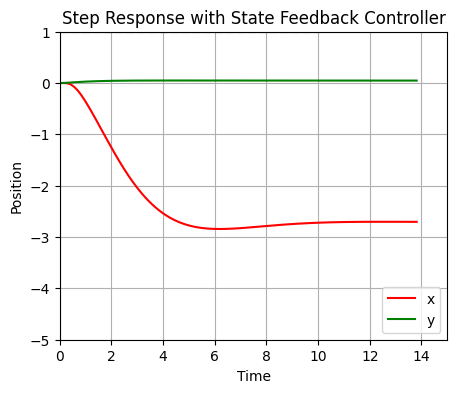

In [15]:
# Step response of x output of CL system 
T1, x_out = ct. step_response(closed_loop_system[0,0])

# Step response of y output of CL system 
T2, y_out = ct. step_response(closed_loop_system[1,1])

# Define the time span 
t = np.linspace(0, 20, 1000)
# plot the step response 
plt.figure(figsize=(5, 4))
plt.plot(T1, x_out, 'r', T2, y_out, 'g')
plt.title("Step Response with State Feedback Controller")
plt.plot([0, 10], [1, 1], 'k--')
plt.axis([0, 15, -5, 1])
plt.ylabel('Position')
plt.xlabel('Time')
plt.legend(('x', 'y'), loc='lower right')
plt.grid (True)
plt.show()

In [16]:
# Observer State Feedback Control
L = ct.place(A.T,C.T, desired_eigenvalues).T 
print(L)



[[ 7.12366  0.5336 ]
 [-1.00428  5.85134]
 [-4.03795 -0.47604]
 [40.52771  4.34555]
 [-1.41133  4.42892]
 [-1.60361 -1.02109]]
